# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Cameron Landon
### GitHub Repo: https://github.com/CamLandon/Module06

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Packages

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list
print('All prereqs installed.')

Package            Version
------------------ ---------
anyio              3.7.1
appdirs            1.4.4
asgiref            3.7.2
asttokens          2.2.1
backcall           0.2.0
beautifulsoup4     4.12.2
blis               0.7.10
catalogue          2.0.9
certifi            2023.7.22
charset-normalizer 3.2.0
click              8.1.6
colorama           0.4.6
comm               0.1.3
confection         0.1.0
contextvars        2.4
contourpy          1.1.0
cycler             0.11.0
cymem              2.0.7
debugpy            1.6.7
decorator          5.1.1
en-core-web-sm     3.6.0
exceptiongroup     1.1.2
executing          1.2.0
fonttools          4.41.1
h11                0.14.0
html5lib           1.1
htmltools          0.2.1
idna               3.4
immutables         0.19
importlib-metadata 6.8.0
ipykernel          6.25.0
ipython            8.14.0
ipywidgets         8.0.7
jedi               0.19.0
Jinja2             3.1.2
joblib             1.3.1
jupyter_client     8.3.0
jupyter_core  

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests
import pickle

url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

try:
    # Send a request to fetch the webpage content
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Extract the HTML content from the response
    article_html = response.text

    # Save the HTML content to a .pkl file
    output_filename = "article_html.pkl"
    with open(output_filename, "wb") as file:
        pickle.dump(article_html, file)

    print(f"Article HTML has been successfully extracted and saved to '{output_filename}'.")
except requests.exceptions.RequestException as e:
    print("Error occurred while fetching the webpage:", e)

Article HTML has been successfully extracted and saved to 'article_html.pkl'.


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup

input_filename = "article_html.pkl"

try:
    # Load the HTML content from the .pkl file
    with open(input_filename, "rb") as file:
        article_html = pickle.load(file)

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(article_html, "html.parser")

  # Find the main article container element
    article_container = soup.find("article")  # You may need to use a different tag or class here

    if article_container:
        # Extract and print the text of the article
        article_text = article_container.get_text()
        print(article_text)
    else:
        print("Main article container not found.")
except FileNotFoundError:
    print("The input file does not exist.")
except Exception as e:
    print("Error occurred:", e)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import pickle
import spacy
import en_core_web_sm
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
input_filename = "article_html.pkl"
with open(input_filename, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Find the main article container element
article_container = soup.find("article")

if article_container:
    # Extract the text of the article
    article_text = article_container.get_text()

    # Process the text using spaCy
    doc = nlp(article_text)

    # Filter out punctuation, stopwords, and whitespace and convert to lowercase
    tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

    # Get the 5 most frequent tokens
    most_common_tokens = Counter(tokens).most_common(5)

    # Print the common tokens and their frequencies
    print("Most frequent tokens:")
    for token, frequency in most_common_tokens:
        print(f"{token}: {frequency}")

else:
    print("Main article container not found.")


Most frequent tokens:
laser: 35
headlights: 19
headlight: 11
technology: 10
led: 10


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import pickle
import spacy
from collections import Counter
import string
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
input_filename = "article_html.pkl"
with open(input_filename, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Find the main article container element
article_container = soup.find("article")

if article_container:
    # Extract the text of the article
    article_text = article_container.get_text()

    # Process the text using spaCy
    doc = nlp(article_text)

    # Filter out punctuation, stopwords, and whitespace and convert to lowercase lemmas
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_space]

    # Get the 5 most frequent lemmas
    most_common_lemmas = Counter(lemmas).most_common(5)

    # Print the common lemmas and their frequencies
    print("Most frequent lemmas:")
    for lemma, frequency in most_common_lemmas:
        print(f"{lemma}: {frequency}")

else:
    print("Main article container not found.")


Most frequent lemmas:
laser: 40
headlight: 28
beam: 12
technology: 10
light: 10


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

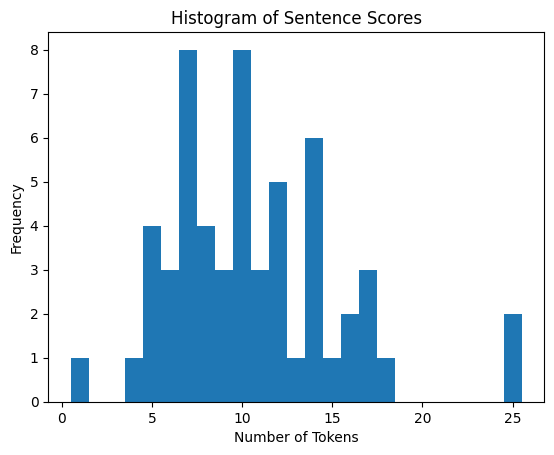

In [6]:
import pickle
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
input_filename = "article_html.pkl"
with open(input_filename, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Find the main article container element
article_container = soup.find("article")

if article_container:
    # Extract the text of the article
    article_text = article_container.get_text()

    # Process the text using spaCy
    doc = nlp(article_text)

    # Calculate scores for each sentence based on tokens
    sentence_scores = []
    for sentence in doc.sents:
        tokens = [token.text.lower() for token in sentence if token.is_alpha and not token.is_stop and not token.is_space]
        sentence_score = len(tokens)
        sentence_scores.append(sentence_score)

    # Plot a histogram of sentence scores
    plt.hist(sentence_scores, bins=range(1, max(sentence_scores) + 2), align='left')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sentence Scores')
    plt.show()

else:
    print("Main article container not found.")


### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

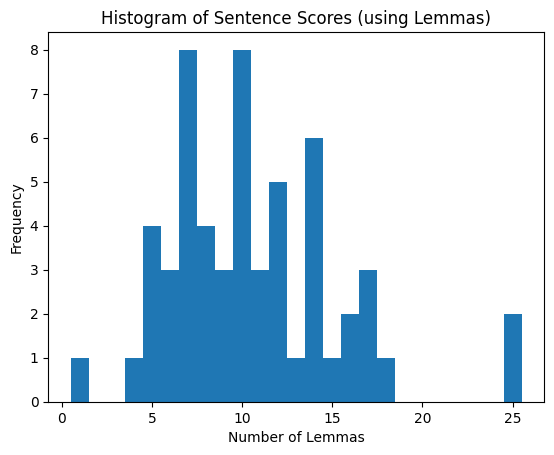

In [9]:
import pickle
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Load the article HTML from the .pkl file
input_filename = "article_html.pkl"
with open(input_filename, "rb") as file:
    article_html = pickle.load(file)

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(article_html, "html.parser")

# Find the main article container element
article_container = soup.find("article")

if article_container:
    # Extract the text of the article
    article_text = article_container.get_text()

    # Process the text using spaCy
    doc = nlp(article_text)

    # Calculate scores for each sentence based on lemmas
    sentence_scores = []
    for sentence in doc.sents:
        lemmas = [token.lemma_.lower() for token in sentence if token.is_alpha and not token.is_stop and not token.is_space]
        sentence_score = len(lemmas)
        sentence_scores.append(sentence_score)

    # Plot a histogram of sentence scores
    plt.hist(sentence_scores, bins=range(1, max(sentence_scores) + 2), align='left')
    plt.xlabel('Number of Lemmas')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sentence Scores (using Lemmas)')
    plt.show()

else:
    print("Main article container not found.")


### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

"t tokens = [token.text.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_spac"

"
    lemmas = [token.lemma_.lower() for token in doc if token.pos_ == 'NOUN' and not token.is_"space]